# Fast & slow modes
Ara provaré de resoldre l'equació i representar cada vegada per a cada valor de kz... això pot petar molt, així que ojito!

En teoria toca bastar amb un for i puc eliminar l'equació de fora del bucle, així com el solver i demés...

En aquest codi vull que es representin els errors, modes normals de v10x i v10z, i la relació de dispersió per a cada valor de kz de manera que es puguin comparar
fàcilment els resultats.
tamany kz_list = 50
kz_list [0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
2025-04-25 13:36:03,209 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 3s, Remaining: 0s, Rate: 3.0e-01/s
evals_k.size (before)  13000
evals_k.size (after removing inf)  13000
evals_k.size (after re

/var/folders/pr/429w6vjs7g15jgb94g5_03_40000gn/T/ipykernel_85779/3751439080.py:192: RuntimeWarning: invalid value encountered in divide
  relative_error = np.abs((evals_k - true_evals) / true_evals)


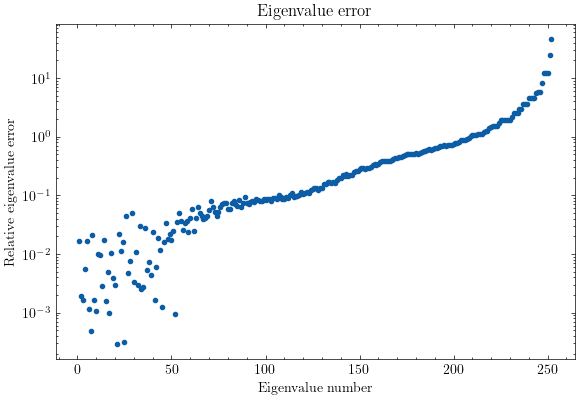

/var/folders/pr/429w6vjs7g15jgb94g5_03_40000gn/T/ipykernel_85779/3751439080.py:234: RuntimeWarning: invalid value encountered in divide
  ug = (u['g']).real / (u['g'][1]).real


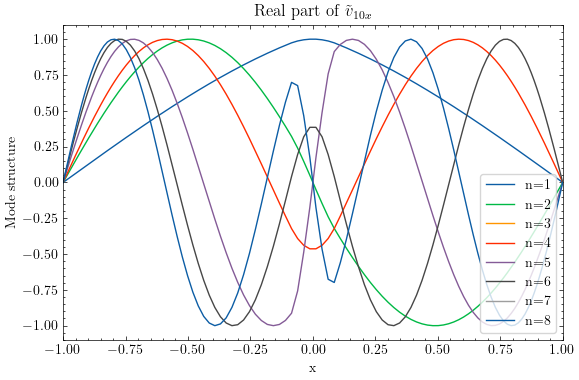

/var/folders/pr/429w6vjs7g15jgb94g5_03_40000gn/T/ipykernel_85779/3751439080.py:263: RuntimeWarning: invalid value encountered in divide
  ug = (u['g'] / u['g'][1]).real
/var/folders/pr/429w6vjs7g15jgb94g5_03_40000gn/T/ipykernel_85779/3751439080.py:264: RuntimeWarning: invalid value encountered in divide
  ui = (u['g'] / u['g'][1]).imag


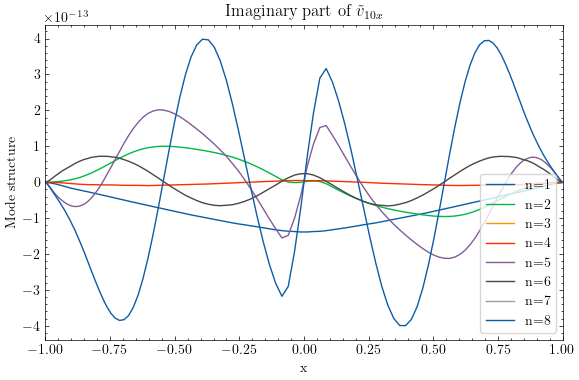

/var/folders/pr/429w6vjs7g15jgb94g5_03_40000gn/T/ipykernel_85779/3751439080.py:286: RuntimeWarning: invalid value encountered in divide
  wg = (w['g'] / w['g'][1]).real


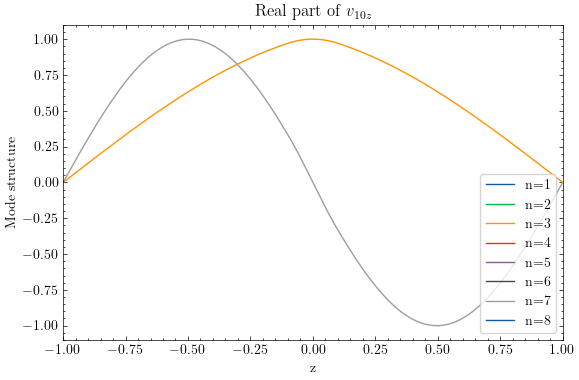

/var/folders/pr/429w6vjs7g15jgb94g5_03_40000gn/T/ipykernel_85779/3751439080.py:308: RuntimeWarning: invalid value encountered in divide
  wg = (w['g'] / w['g'][1]).real
/var/folders/pr/429w6vjs7g15jgb94g5_03_40000gn/T/ipykernel_85779/3751439080.py:309: RuntimeWarning: invalid value encountered in divide
  wi = (w['g'] / w['g'][1]).imag


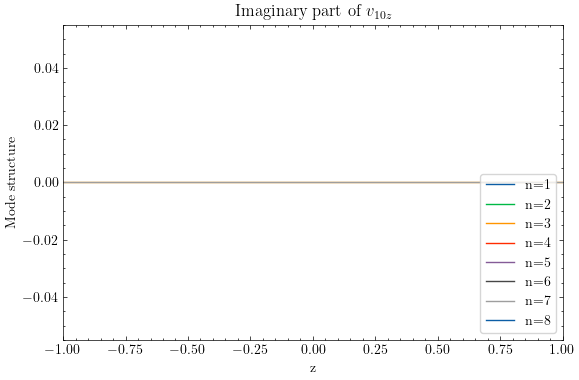

2025-04-25 13:36:14,297 subsystems 0/1 INFO :: Building subproblem matrices 1/1 (~100%) Elapsed: 6s, Remaining: 0s, Rate: 1.6e-01/s


ValueError: setting an array element with a sequence.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import dedalus.public as d3
from scipy.optimize import fsolve
import logging
logger = logging.getLogger(__name__)
import scienceplots
plt.style.use('science')



""" Funcions per calcular els autovalors exactes """
# Funcions den Monxo per calcular els autovalors exactes d'una corda amb densitat variable.
def dispersion_relation(omega):
    disprel_even = (np.sqrt(cp2)/np.sqrt(cc2)) * np.cos(omega * (xmax - xp) / np.sqrt(cc2)) * np.cos(omega * xp / np.sqrt(cp2)) - \
        np.sin(omega * (xmax - xp) / np.sqrt(cc2)) * np.sin(omega * xp / np.sqrt(cp2))
    disprel_odd = (np.sqrt(cp2)/np.sqrt(cc2)) * np.cos(omega * (xmax - xp) / np.sqrt(cc2)) * np.sin(omega * xp / np.sqrt(cp2)) + \
        np.sin(omega * (xmax - xp) / np.sqrt(cc2)) * np.cos(omega * xp / np.sqrt(cp2))
    disprel = disprel_even * disprel_odd
    return disprel

def dispersion_relation2(omega):
    disprel_even2 = (np.sqrt(vAp2)/np.sqrt(vAc2)) * np.cos(omega * (xmax - xp) / np.sqrt(vAc2)) * np.cos(omega * xp / np.sqrt(vAp2)) - \
        np.sin(omega * (xmax - xp) / np.sqrt(vAc2)) * np.sin(omega * xp / np.sqrt(vAp2))
    disprel_odd2 = (np.sqrt(vAp2)/np.sqrt(vAc2)) * np.cos(omega * (xmax - xp) / np.sqrt(vAc2)) * np.sin(omega * xp / np.sqrt(vAp2)) + \
        np.sin(omega * (xmax - xp) / np.sqrt(vAc2)) * np.cos(omega * xp / np.sqrt(vAp2))
    disprel2 = disprel_even2 * disprel_odd2
    return disprel2

def get_eigenvalues(Nevals):
    Nsol = 0
    omega0 = 1
    omega_step = 0.5
    exact_soln = np.array([])
    while Nsol < Nevals:
        sol = fsolve(dispersion_relation, omega0)
#         print('omega0, sol ', omega0, sol)
        sol2 = fsolve(dispersion_relation2, omega0)

        if sol > 0:
            exact_soln = np.append(exact_soln, sol)
            exact_soln = np.unique(exact_soln.round(decimals=8))
#         print('exact_soln, exact_soln**2 ', exact_soln, exact_soln**2)
#         print(exact_soln.size)
        if sol2 > 0:
            exact_soln = np.append(exact_soln, sol2)
            exact_soln = np.unique(exact_soln.round(decimals=8))

        Nsol = exact_soln.size
        omega0 = omega0 + omega_step
#    print('exact_soln ', exact_soln[0:5])
#    print('exact_soln**2 ', exact_soln**2)
    print()
    return exact_soln



""" Paràmetres """
Nx = 128 # amb 32 ja no és smooth...
dtype = np.complex128 # malla en la que es treballa: 128 complexes, ja que hem definit Nx = 128



""" Límits del domini """
xmax = 1
xmin = -1 # = -xmax
# Position of boundaries between different parts of the system (prominence and corona).
xp = 0.1
# xc ∈ [-1, -0.1], xc ∈ [0.1, 1]



""" Constants """
#kz = 0.01
#B0 = 0

### Velocitats a trossos ###
cp2 = 1
cc2 = 6
vAp2 = 10
vAc2 = 36



""" Bases """
xcoord = d3.Coordinate('x')
dist = d3.Distributor(xcoord, dtype=dtype)
xbasis = d3.Legendre(xcoord, size=Nx, bounds=(xmin, xmax)) # Definim una base amb uns altres límits. Chebyshev menos error?



""" Camps """
### Velocitats ### --- autofuncions?
u = dist.Field(name='u', bases=xbasis) # u = field of the wave function - AUTOFUNCIÓ!!! - v10x bar, coplexa
w = dist.Field(name='w', bases=xbasis) # w = Velocity in the x direction   v10z - real
# Definesc la velocitat com en oceano: (u,v,w) per no liar subíndexos i derivades.

### Espai real ###
x = dist.local_grid(xbasis) # PUNTS DEL DOMINI!!!

### Constants ###
c2 = dist.Field(name='c2', bases=xbasis) # c2 = Velocitat al quadrat ----- és interessant definir-la directament al quadrat ja que és un camp i així evitam fer c.evaluate()**2
c2['g'] = np.piecewise(x, [x < -xp, (-xp <= x) * (x <= xp), x > xp], [cc2, cp2, cc2]) # Representa la c^2 en l'espai real ('g') a trossos.
vA2 = dist.Field(name='vA2', bases=xbasis) # vA2 = Alfven velocity squared
vA2['g'] = np.piecewise(x, [x < -xp, (-xp <= x) * (x <= xp), x > xp], [vAc2, vAp2, vAc2]) # Representa la velocitat d'Alfven en l'espai real ('g') a trossos.
kz = dist.Field(name='kz', bases=xbasis) # kz = Wave number in the z direction

### Autovalors ###
s = dist.Field(name='s') # AUTOVALOR ω^2 = s

### Auxiliars de les derivades ###
tau_1 = dist.Field(name='tau_1')
tau_2 = dist.Field(name='tau_2')
tau_3 = dist.Field(name='tau_3')
tau_4 = dist.Field(name='tau_4')



""" Derivades """
### Derivades espacials ###
dx = lambda A: d3.Differentiate(A, xcoord) # Derivative operator
lift_basis = xbasis.derivative_basis(1)
lift = lambda A: d3.Lift(A, lift_basis, -1)
ux = dx(u) + lift(tau_1) # First-order reduction of the velocity in the x direction
uxx = dx(ux) + lift(tau_2) # Second-order reduction of the velocity in the x direction
wx = dx(w) + lift(tau_3) # First-order reduction of the velocity in the z direction
wxx = dx(wx) + lift(tau_4) # Second-order reduction of the velocity in the z direction
# No és convenient posar directament dx(u) a l'equació ja que faltaria el lift... s'ha de definir bé la derivada
# No definim derivada temporal ja que és un EVP!!!

# velocitat dedins menor que defora; alfven major primer, després provar...

# A l'hora de representar la part real de les autofuncions has de tenir clar que la velocitat u és en la direcció x i la w en z. També que v10x és imaginària i v10z és real.
# A més, el que es representa és la velocitat, no la corda en sí. Llavors un node implica velocitat nul·la: aquell punt no es mou.
# Els màxims i mínims són els punts on la velocitat és màxima, no és que la corda es deformi amb aquella forma.



### Relació de dispersió ###

Nkz = 50 # Nombre de kz
kz_list = np.linspace(0, 5, Nkz) # hi ha Nkz entre 0 i 5

evals_k = np.zeros((kz_list.size, 260), dtype=np.complex128)
print("En aquest codi vull que es representin els errors, modes normals de v10x i v10z, i la relació de dispersió per a cada valor de kz de manera que es puguin comparar")
print("fàcilment els resultats.")
print("tamany kz_list =",kz_list.size)
print("kz_list", kz_list)

for ik, kz in enumerate(kz_list):
    problem = d3.EVP([u, w, tau_1, tau_2, tau_3, tau_4], eigenvalue=s, namespace=locals())
    problem.add_equation("s * u  +  c2 * uxx  +  kz * c2 * wx  =  0") # (17')
    problem.add_equation("vA2 * wxx  +  c2 * kz * ux  +  (-c2 * kz**2 - vA2 * kz**2 + s) * w  =  0") # (19')
    problem.add_equation("u(x=xmin) = 0")
    problem.add_equation("u(x=xmax) = 0")
    problem.add_equation("w(x=xmin) = 0")
    problem.add_equation("w(x=xmax) = 0")

    solver = problem.build_solver()
    solver.solve_dense(solver.subproblems[0])

    # Sort and filter eigenvalues
    eigenvalues = np.sort(solver.eigenvalues)
    eigenvalues = eigenvalues[eigenvalues > 0]  # Remove negative eigenvalues

    eigenvalues = np.array(eigenvalues).flatten()

    # Assign to evals_k
    #evals_k[ik, :eigenvalues.size] = np.sqrt(eigenvalues)
    evals_k[ik, :len(eigenvalues)] = np.sqrt(eigenvalues)

    #evals_k[ik, :] = np.sqrt(eigenvalues)
    #evals_k[ik] = np.sort(solver.eigenvalues)

    ### Printam tamany evals ###
    print('evals_k.size (before) ', evals_k.size)
    #evals_k = evals_k[~np.isinf(evals_k)] # el ~ és un operador bitwise NOT, que retorna True si el valor és False i viceversa. En aquest cas elimina els valors infinits
    print('evals_k.size (after removing inf) ', evals_k.size)
    evals_k = evals_k[evals_k > 0] # eliminam els valors negatius
    print('evals_k.size (after removing < 0) ', evals_k.size)
    evals_k = np.sqrt(evals_k)
    print('evals_k.size (after sqrt) ', evals_k.size)
    print(evals_k)

    ### Autovalors exactes ###
    Nevals = eigenvalues.size
    exact_soln = get_eigenvalues(Nevals)
    true_evals = exact_soln[0:Nevals]
    n = 1 + np.arange(Nevals)

    ### Error relatiu ###
    relative_error = np.abs((evals_k - true_evals) / true_evals)

    ### Autovalors ###
    print('evals_k size', evals_k.size)
    print("true_evals size ", true_evals.size)
    #print("Evals", evals)
    #print("True Evals", true_evals)

    # Agafam la part real per fer un print més net
    evals_k = evals_k.real
    print("First 5 Eigenvalues (sqrt):", evals_k[:5])
    print("First 5 True eigenvalues:", true_evals[:5])
    print("Relative error:", relative_error[:5])

    print("kz =", kz) # Me posa kz literalment si està fora del for però està fent to amb el darrer valor de kz_list (kz = 5)

    #print("Comprovam els evals, que crec que no estan sortint bé:", evals)
    #print("Comprovam els evals_k, que no sé si estan sortint bé:", evals_k)


    ### Plots ###
    # Plot error
    plt.figure(figsize=(6, 4))
    plt.semilogy(n, relative_error, '.')
    plt.xlabel("Eigenvalue number")
    plt.ylabel("Relative eigenvalue error")
    plt.tight_layout()
    plt.title("Eigenvalue error")
    plt.show()
    #plt.savefig("eigenvalue_error.pdf")
    #plt.savefig("eigenvalue_error.png", dpi=200)

    # Plot real part of v10x
    plt.figure(figsize=(6, 4))
    x = dist.local_grid(xbasis) # no acab d'entendre perquè es repeteix el domini... per si l'has tuneat penmig maybe
    for n, idx in enumerate(np.argsort(solver.eigenvalues)[:8], start=1):
        solver.set_state(idx, solver.subsystems[0])
        #ug = u['g'].real
        #if np.max(np.abs(ug)) != 0:  # Avoid division by zero
        #    ug /= np.max(np.abs(ug))
        #plt.plot(x, ug, label=f"n={n}")

        ug = (u['g']).real / (u['g'][1]).real
        #print(u['g'][1])
        plt.plot(x, ug/np.max(np.abs(ug)), label=f"n={n}") # quan es normalitza es divideix per zero... pq hi ha una autofunció nul·la?
    plt.xlim(-1, 1)
    plt.legend(loc="lower right", frameon=True)
    plt.ylabel(r"Mode structure")
    plt.xlabel(r"x")
    plt.title(r"Real part of $\tilde{v}_{10x}$") # idò és imaginària ---> desfassament temporal de 1/4 de període
    plt.tight_layout()
    plt.show()
    # plt.savefig("real_eigenvectors_v10x~.pdf")
    # plt.savefig("real_eigenvectors_v10x~.png", dpi=200)

    # Plot imaginary part of v10x
    plt.figure(figsize=(6, 4))
    x = dist.local_grid(xbasis)
    for n, idx in enumerate(np.argsort(solver.eigenvalues)[:8], start=1):
        solver.set_state(idx, solver.subsystems[0])
        # if u['g'][1] != 0:
            # ui = (u['g'] / u['g'][1]).imag
        # else:
            # ui = u['g'].imag  # Skip normalization
        #ug = u['g'].real
        #ui = u['g'].imag
        #if np.max(np.abs(ug)) != 0:  # Avoid division by zero
         #   ui /= np.max(np.abs(ug)) # Normalitzam per la part real (ug), que és molt major i no ens resulta en la mateixa autofunció
    
        #plt.plot(x, ui, label=f"n={n}")
    
        ug = (u['g'] / u['g'][1]).real
        ui = (u['g'] / u['g'][1]).imag
        plt.plot(x, ui/np.max(np.abs(ug)), label=f"n={n}") # no normalitzam pq ens divideix per 0 ### ara sí normalitzam
    plt.xlim(-1, 1)
    plt.legend(loc="lower right", frameon=True)
    plt.ylabel(r"Mode structure")
    plt.xlabel(r"x")
    plt.title(r"Imaginary part of $\tilde{v}_{10x}$") # idò és real ---> desfassament temporal de 1/4 de període
    plt.tight_layout()
    plt.show()
    # plt.savefig("imag_eigenvectors_v10x~.pdf")
    # plt.savefig("imag_eigenvectors_v10x~.png", dpi=200)

    # Plot real part of v10z
    plt.figure(figsize=(6, 4))
    x = dist.local_grid(xbasis)
    for n, idx in enumerate(np.argsort(solver.eigenvalues)[:8], start=1):
        solver.set_state(idx, solver.subsystems[0])
        #wg = w['g'].real
        #if np.max(np.abs(wg)) != 0:  # Avoid division by zero
        #    wg /= np.max(np.abs(wg))
        #plt.plot(x, wg, label=f"n={n}")

        wg = (w['g'] / w['g'][1]).real
        plt.plot(x, wg/np.max(np.abs(wg)), label=f"n={n}")
    plt.xlim(-1, 1)
    plt.legend(loc="lower right", frameon=True)
    plt.ylabel(r"Mode structure")
    plt.xlabel(r"z")
    plt.title(r"Real part of ${v}_{10z}$")
    plt.tight_layout()
    plt.show()
    # plt.savefig("real_eigenvectors_v10z.pdf")
    # plt.savefig("real_eigenvectors_v10z.png", dpi=200)

    # Plot real part of v10z
    plt.figure(figsize=(6, 4))
    x = dist.local_grid(xbasis)
    for n, idx in enumerate(np.argsort(solver.eigenvalues)[:8], start=1):
        solver.set_state(idx, solver.subsystems[0])
        #wi = u['g'].imag
        #if np.max(np.abs(wi)) != 0:  # Avoid division by zero
        #    wi /= np.max(np.abs(wi)) # Normalitzam per la part real (wg), que és molt major i no ens resulta en la mateixa autofunció
        #plt.plot(x, wi, label=f"n={n}")
    
        wg = (w['g'] / w['g'][1]).real
        wi = (w['g'] / w['g'][1]).imag
        plt.plot(x, wi/np.max(np.abs(wg)), label=f"n={n}")
    plt.xlim(-1, 1)
    plt.legend(loc="lower right", frameon=True)
    plt.ylabel(r"Mode structure")
    plt.xlabel(r"z")
    plt.title(r"Imaginary part of ${v}_{10z}$")
    plt.tight_layout()
    plt.show()
    # plt.savefig("imag_eigenvectors_v10z.pdf")
    # plt.savefig("imag_eigenvectors_v10z.png", dpi=200)



# Plot dispersion relation of the first 8 eigenvalues # v = (√s)/k
plt.figure(figsize=(6, 4))
for i in range(8):
    colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray']
    plt.plot(kz_list, np.sqrt(evals_k[:, i].real), '.', label=f"Mode {i+1}", color=colors[i % len(colors)])
plt.xlabel(r"$k_z$")
plt.ylabel(r"$\omega = \sqrt{s}$")
plt.title(f"$Dispersion Relation for kz = {kz}$")
plt.grid(True)    
plt.legend(loc="upper right", frameon=True, fontsize=8)
plt.show()

# Per veure amb més detall la relació de dispersió de cada mode la representam individualment.b
plt.figure(figsize=(6, 4))
for i in range(8):
    colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray']
    plt.plot(kz_list, np.sqrt(evals_k[:, i].real), '.', label=f"Mode {i+1}", color=colors[i % len(colors)])
    plt.xlabel(r"$k_z$")
    plt.ylabel(r"$\omega = \sqrt{s}$")
    plt.title("Dispersion Relation, N =", f"{i+1}")
    plt.grid(True)
    plt.show()
plt.show()


# Ficar els plots de les velocitats dins el for i representar les velocitats per cada kz... pot tardar bastant però crec que és el que he de fer!